### Let's take some data from the literature for RR Lyrae stars in M4

RR Lyrae stars are variable pulsators that obey a precise period-luminosity relation. As such they are used as a distance indicator. Here we will attempt to determine the distance to the globular cluster M4 using a sample of 37 RR Lyrae stars observed with Spitzer by Neeley et al. (2015): http://cdsads.u-strasbg.fr/abs/2015ApJ...808...11N

The FU class of RR Lyrae follow the relation:

$$
m = a\ ({\rm log}\ P + 0.26) + b
$$

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

RR_lyrae_table2 = Table.read('./data/table2.dat', readme='./data/ReadMe', format='cds')
RR_lyrae = RR_lyrae_table2[RR_lyrae_table2['Mode'] == 'RRab']

# Now remove sources V20 and V21 due to blending
RR_lyrae = RR_lyrae[RR_lyrae['ID'] != 'V20']
RR_lyrae = RR_lyrae[RR_lyrae['ID'] != 'V21']
# RR_lyrae = RR_lyrae[np.isfinite(RR_lyrae["[4.5]"])]
print(RR_lyrae.colnames)
logP, m36 = RR_lyrae["logP"], RR_lyrae['[3.6]']
logP, m36 = logP[~m36.mask], m36[~m36.mask]

['ID', 'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm', 'DEs', 'Per', 'logP', '[3.6]', 'e_[3.6]', 'f_[3.6]', '[4.5]', 'e_[4.5]', 'f_[4.5]', '3.6amp', 'e_3.6amp', '4.5amp', 'e_4.5amp', 'Mode', 'f_Mode']


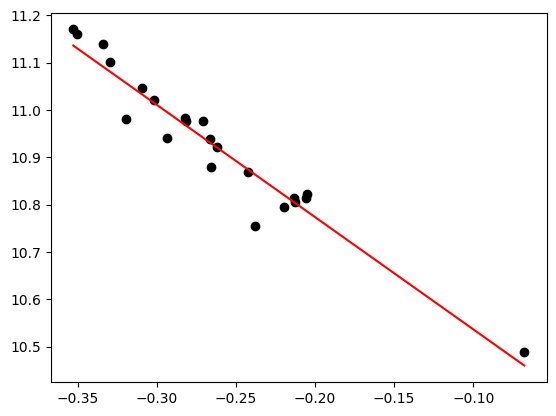

In [44]:
params = np.polyfit(logP, m36, deg=1)
xx = np.linspace(np.min(logP), np.max(logP), 40)
yy = np.polyval(params, xx)

plt.figure()
plt.plot(logP, m36, "ko")
plt.plot(xx, yy, "r-")
plt.show()

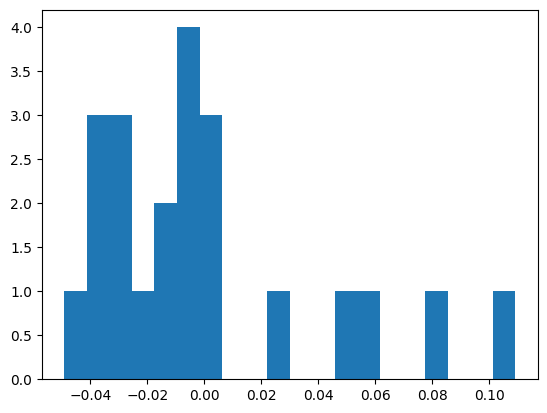

In [47]:
plt.figure()
plt.hist(np.polyval(params, logP) - m36, bins=20)
plt.show()